<a href="https://colab.research.google.com/github/TKhahahah/NYC-Taxi-data/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


In [ ]:
# Old libraries that we know and love.
import numpy as np
import matplotlib.pylab as py
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook

# Our new libraries.
from sklearn import model_selection, linear_model, feature_selection, metrics

In [ ]:
!pip install pyarrow
import pyarrow.parquet as pq

In [ ]:
taxi = pd.read_parquet('/content/drive/MyDrive/DTW2/cleaned_final.parquet')
taxi

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,tolls_amount,congestion_surcharge,Airport_fee,date,time,weekday,duration
0,2,2024-10-01 00:30:44,2024-10-01 00:48:26,1.0,3.00,1.0,162,246,18.400000,1.50,0.00,2.5,0.0,2024-10-01,0,Tuesday,17.700001
1,1,2024-10-01 00:12:20,2024-10-01 00:25:25,1.0,2.20,1.0,48,236,14.200000,3.80,0.00,2.5,0.0,2024-10-01,0,Tuesday,13.083333
2,1,2024-10-01 00:04:46,2024-10-01 00:13:52,1.0,2.70,1.0,142,24,13.500000,3.70,0.00,2.5,0.0,2024-10-01,0,Tuesday,9.100000
3,1,2024-10-01 00:12:10,2024-10-01 00:23:01,1.0,3.10,1.0,233,75,14.200000,2.00,0.00,2.5,0.0,2024-10-01,0,Tuesday,10.850000
5,2,2024-10-01 00:31:20,2024-10-01 00:36:00,2.0,0.97,1.0,137,137,7.200000,2.44,0.00,2.5,0.0,2024-10-01,0,Tuesday,4.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148500,1,2024-12-31 23:42:33,2024-12-31 23:53:54,1.0,1.70,1.0,61,71,11.400000,0.00,0.00,2.5,0.0,2024-12-31,23,Tuesday,11.350000
11148501,1,2024-12-31 23:21:36,2024-12-31 23:32:10,1.0,1.60,1.0,188,61,13.280000,0.00,0.00,2.5,0.0,2024-12-31,23,Tuesday,10.566667
11148504,1,2024-12-31 23:14:53,2024-12-31 23:35:13,1.0,2.90,1.0,145,164,21.940001,0.00,6.94,2.5,0.0,2024-12-31,23,Tuesday,20.333334
11148508,2,2024-12-31 23:03:16,2024-12-31 23:28:35,1.0,3.94,1.0,181,255,4.460000,5.19,0.00,2.5,0.0,2024-12-31,23,Tuesday,25.316668


In [ ]:
taxi2 = taxi[['trip_distance','congestion_surcharge','fare_amount','tip_amount','tolls_amount','Airport_fee','duration']]
taxi2

,trip_distance,congestion_surcharge,fare_amount,tip_amount,tolls_amount,Airport_fee,duration
0,3.00,2.5,18.400000,1.50,0.00,0.0,17.700001
1,2.20,2.5,14.200000,3.80,0.00,0.0,13.083333
2,2.70,2.5,13.500000,3.70,0.00,0.0,9.100000
3,3.10,2.5,14.200000,2.00,0.00,0.0,10.850000
5,0.97,2.5,7.200000,2.44,0.00,0.0,4.666667
...,...,...,...,...,...,...,...
11148500,1.70,2.5,11.400000,0.00,0.00,0.0,11.350000
11148501,1.60,2.5,13.280000,0.00,0.00,0.0,10.566667
11148504,2.90,2.5,21.940001,0.00,6.94,0.0,20.333334
11148508,3.94,2.5,4.460000,5.19,0.00,0.0,25.316668


In [ ]:
taxi2['trip_distance'].value_counts()

,count
trip_distance,
0.900000,132397
1.000000,132199
0.800000,130152
1.100000,128450
1.200000,123561
...,...
38.099998,1
53.900002,1
50.000000,1


# Split train-test

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Standardize data using MIN MAX
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(taxi2)
taxi_normalized = scaler.transform(taxi2)
print(taxi_normalized)

[[0.03085974 1.         0.06420462 ... 0.         0.         0.09326377]
 [0.02260295 1.         0.04723423 ... 0.         0.         0.06745551]
 [0.02776344 1.         0.04440583 ... 0.         0.         0.04518774]
 ...
 [0.02982764 1.         0.07850823 ... 0.04626667 0.         0.10798472]
 [0.04056146 1.         0.00787911 ... 0.         0.         0.13584274]
 [0.04324492 1.         0.09923632 ... 0.         0.         0.11133885]]


In [ ]:
taxi_normalized

array([[0.03085974, 1.        , 0.06420462, ..., 0.        , 0.        ,
        0.09326377],
       [0.02260295, 1.        , 0.04723423, ..., 0.        , 0.        ,
        0.06745551],
       [0.02776344, 1.        , 0.04440583, ..., 0.        , 0.        ,
        0.04518774],
       ...,
       [0.02982764, 1.        , 0.07850823, ..., 0.04626667, 0.        ,
        0.10798472],
       [0.04056146, 1.        , 0.00787911, ..., 0.        , 0.        ,
        0.13584274],
       [0.04324492, 1.        , 0.09923632, ..., 0.        , 0.        ,
        0.11133885]], dtype=float32)

In [ ]:
# Select out our predictor columns and our response columns
# Assuming the order of columns in taxi_normalized is the same as in taxi2:
# 'trip_distance', 'RatecodeID', 'fare_amount', 'tip_amount', 'tolls_amount', 'Airport_fee', 'duration'
X = taxi_normalized[:, [0, 1, 3, 4, 5, 6]] # Select columns for X (excluding fare_amount)
y = taxi_normalized[:, [2]] # Select column for y (fare_amount)

# Select subsets for training and testing
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,
                                                                  y,
                                                                  test_size=0.2,
                                                                  random_state=123)

In [ ]:
X

array([[0.03085974, 1.        , 0.00262009, 0.        , 0.        ,
        0.09326377],
       [0.02260295, 1.        , 0.00663755, 0.        , 0.        ,
        0.06745551],
       [0.02776344, 1.        , 0.00646288, 0.        , 0.        ,
        0.04518774],
       ...,
       [0.02982764, 1.        , 0.        , 0.04626667, 0.        ,
        0.10798472],
       [0.04056146, 1.        , 0.0090655 , 0.        , 0.        ,
        0.13584274],
       [0.04324492, 1.        , 0.        , 0.        , 0.        ,
        0.11133885]], dtype=float32)

In [ ]:
y

array([[0.06420462],
       [0.04723423],
       [0.04440583],
       ...,
       [0.07850823],
       [0.00787911],
       [0.09923632]], dtype=float32)

In [ ]:
X_train

array([[0.03013727, 1.        , 0.00524017, 0.        , 0.        ,
        0.06801453],
       [0.01176592, 1.        , 0.        , 0.        , 0.        ,
        0.07388429],
       [0.01290123, 1.        , 0.01179039, 0.        , 0.        ,
        0.13379298],
       ...,
       [0.18299103, 1.        , 0.        , 0.        , 1.        ,
        0.43026182],
       [0.01228197, 1.        , 0.00174672, 0.        , 0.        ,
        0.04910091],
       [0.00743111, 1.        , 0.00478603, 0.        , 0.        ,
        0.0253424 ]], dtype=float32)

In [ ]:
y_train

array([[0.08820558],
       [0.03406198],
       [0.0726898 ],
       ...,
       [0.2726979 ],
       [0.03026385],
       [0.01895026]], dtype=float32)

# Base line

## Linear regression

In [ ]:
# Run the solver
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# There are the slope and intercept of the line we computed.
# Beta_0
print(reg.intercept_)
# Beta_1
print(reg.coef_)

[0.12571864]
[[ 0.01310097 -0.07017756  0.00130974  0.00291121  0.11478439  0.01624025]]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = reg.predict(X_test)

# Evaluate the model
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 0.00
Coefficient of determination: 0.37


In [ ]:
print(f"R2 score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


R2 score: 0.37
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.05


In [ ]:
# Use the metrics package to print our errors
print('training error')
print(metrics.mean_squared_error(y_train,reg.predict(X_train)))
print('testing error')
print(metrics.mean_squared_error(y_test,reg.predict(X_test)))

training error
0.002747810445725918
testing error
0.0027474279049783945


In [ ]:
import matplotlib.pyplot as plt

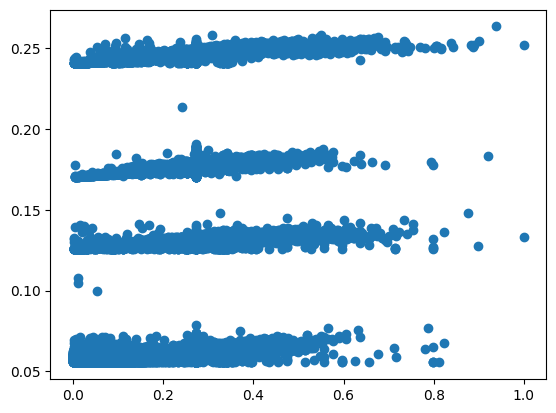

In [ ]:
plt.scatter(y_test,y_pred)

## Lasso

In [ ]:
# Run the solver
regLasso = linear_model.Lasso(alpha=0.001,fit_intercept=True)#,normalize=True)
regLasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [ ]:
y_pred_lasso = regLasso.predict(X_test)

In [ ]:
print(regLasso.intercept_)
print(regLasso.coef_)

[0.02851359]
[ 0.         -0.00712261  0.          0.          0.06980421  0.46504983]


In [ ]:
print(f"R2 score: {r2_score(y_test, y_pred_lasso):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}")

R2 score: 0.77
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03


In [ ]:
# Use the metrics package to print our errors
print('training error')
print(metrics.mean_squared_error(y_train,regLasso.predict(X_train)))
print('testing error')
print(metrics.mean_squared_error(y_test,regLasso.predict(X_test)))

training error
0.0010139425285160542
testing error
0.0010191646870225668


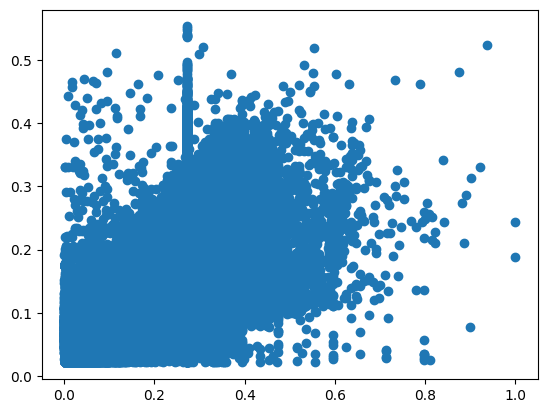

In [ ]:
plt.scatter(y_test,y_pred_lasso)

## Ridge regression

### Hyperparameter tuning use RandomizedSearchCV

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# 1️⃣ สร้างโมเดลพื้นฐาน
ridge = Ridge(random_state=123)

# 2️⃣ กำหนดช่วงของ hyperparameter ที่อยากสุ่มทดสอบ
param_dist = {
    'alpha': uniform(0.001, 10)  # สุ่มค่า alpha จาก 0.001 ถึง 10
}

# 3️⃣ ตั้งค่า RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=param_dist,
    n_iter=20,            # จำนวนรอบการสุ่มลอง (เช่น 20 ชุด)
    cv=5,                 # cross-validation 5 fold
    scoring='r2',         # ใช้ R² เป็นตัววัด
    random_state=123,
    n_jobs=-1             # ใช้ทุกคอร์ CPU เพื่อความเร็ว
)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(random_state=123), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78307d12a0f0>},
                   random_state=123, scoring='r2')

In [ ]:
# 5️⃣ แสดงผลลัพธ์
print("Best alpha:", random_search.best_params_['alpha'])
print("Best cross-validation R²:", random_search.best_score_)

Best alpha: 9.808641983846154
Best cross-validation R²: 0.9373316526412964


In [ ]:
best_ridge = random_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

In [ ]:
ridge_reg = linear_model.Ridge(alpha=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
print(best_ridge.intercept_)
print(best_ridge.coef_)

[0.0277616]
[ 0.9333397  -0.02146341  0.42634034  0.33360675 -0.01699962  0.3073652 ]


In [ ]:
print(f"R2 score: {r2_score(y_test, y_pred_ridge):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}")

R2 score: 0.94
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.02


In [ ]:
print('training error')
print(metrics.mean_squared_error(y_train,ridge_reg.predict(X_train)))
print('testing error')
print(metrics.mean_squared_error(y_test,ridge_reg.predict(X_test)))

training error
0.00027395348297432065
testing error
0.000274532416369766


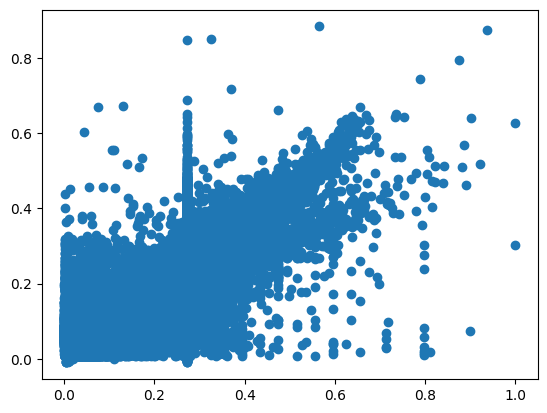

In [ ]:
plt.scatter(y_test,y_pred_ridge)

#

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Run the decision tree regression algorithm
reg_random = RandomForestRegressor(max_depth=2,n_estimators=2,random_state=1234).fit(X_train, y_train.ravel())

In [ ]:
y_pred_ran = reg_random.predict(X_test)

In [ ]:
# Use the metrics package to print our errors
print('training error')
print(mean_squared_error(y_train,reg_random.predict(X_train)))
print('testing error')
print(mean_squared_error(y_test,reg_random.predict(X_test)))

training error
0.0006394632083167982
testing error
0.0006425427463953561


In [ ]:
print(f"R2 score: {r2_score(y_test, y_pred_ran):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_ran):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_ran)):.2f}")

R2 score: 0.85
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03


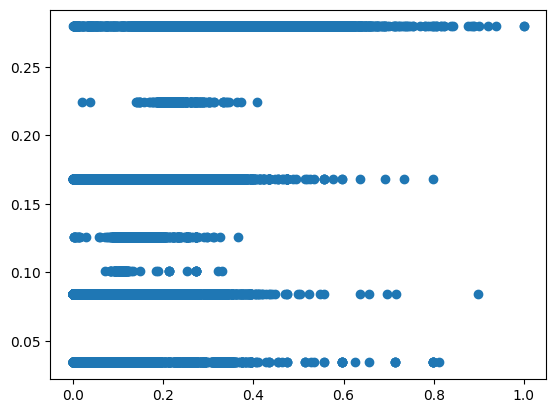

In [ ]:
plt.scatter(y_test,y_pred_ran)

In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Random Forest Regression'],
    'R2 Score': [r2_score(y_test, y_pred), r2_score(y_test, y_pred_lasso), r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_ran)],
    'MSE': [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred_lasso), mean_squared_error(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_ran)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred)), np.sqrt(mean_squared_error(y_test, y_pred_lasso)), np.sqrt(mean_squared_error(y_test, y_pred_ridge)), np.sqrt(mean_squared_error(y_test, y_pred_ran))]
})

# Format the numerical columns for better readability
results['R2 Score'] = results['R2 Score'].map('{:.2f}'.format)
results['MSE'] = results['MSE'].map('{:.4f}'.format)
results['RMSE'] = results['RMSE'].map('{:.4f}'.format)

display(results)

,Model,R2 Score,MSE,RMSE
0,Linear Regression,0.37,0.0027,0.0524
1,Lasso Regression,0.77,0.0010,0.0319
2,Ridge Regression,0.94,0.0003,0.0166
3,Random Forest Regression,0.85,0.0006,0.0253


# Test ridge reggression

In [ ]:
import numpy as np

# ตัวอย่างข้อมูลใหม่ [trip_distance, congestion_fee, tip_amount, tolls_amount, Airport_fee, duration]
new_trip = np.array([[10.71, 2.5, 2.0, 0.0, 0.0, 24.00]])

# ต้อง scale ด้วย scaler เดิม
scaler = MinMaxScaler()
scaler.fit(new_trip)
new_trip_scaled = scaler.transform(new_trip)

# ใช้โมเดล Ridge ที่เทรนไว้ทำนาย
predicted_fare = best_ridge.predict(new_trip_scaled)
print(f"Predicted fare amount: ${predicted_fare[0]:.2f}")


Predicted fare amount: $0.03


In [ ]:
# Convert the predicted scaled fare amount back to original scale

# Create a temporary array with zeros for other columns for inverse transformation
# The original taxi2 had 7 columns, and fare_amount was at index 2.
temp_array = np.zeros((predicted_fare.shape[0], scaler.n_features_in_))
temp_array[:, 2] = predicted_fare.flatten()

# Apply the inverse transform to the temporary array and extract the fare amount
predicted_fare_original = scaler.inverse_transform(temp_array)[:, 2]

print(f"Predicted fare amount (original scale): ${predicted_fare_original[0]:.2f}")

Predicted fare amount (original scale): $2.03


# Test Lasso

In [ ]:
# ใช้โมเดล Lasso ที่เทรนไว้ทำนาย
predicted_fare2 = regLasso.predict(new_trip_scaled)
print(f"Predicted fare amount: ${predicted_fare[0]:.2f}")


Predicted fare amount: $0.03


In [ ]:
# Convert the predicted scaled fare amount back to original scale

# Ensure predicted_fare2 is a 2D array
predicted_fare2 = predicted_fare2.reshape(-1, 1)

# Create a temporary array with zeros for other columns for inverse transformation
# The original taxi2 had 7 columns, and fare_amount was at index 2.
temp_array = np.zeros((predicted_fare2.shape[0], scaler.n_features_in_))
temp_array[:, 2] = predicted_fare2.flatten()

# Apply the inverse transform to the temporary array and extract the fare amount
predicted_fare_amounts_original = scaler.inverse_transform(temp_array)[:, 2]

print(f"Predicted fare amount (original scale) from Lasso: ${predicted_fare_amounts_original[0]:.2f}")

Predicted fare amount (original scale) from Lasso: $2.03


# Conclusion

จากโมเดลทั้งหมดได้แก่ Linear regression, Lasso, Ridge regression and random forest สรุปได้ว่าโมเดลที่่เหมาะสมสำหรับการทำนาย ค่าโดยสาร มากที่สุดคือ Ridge regression โดยพิจารณาจากค่า R squared คือ 0.94 MSE คือ 0.0003 RMSE คือ 0.0166 เมื่อลองนำมาทำนายจากข้อมูลที่สมมติขึ้นมาพบว่าทำนายค่าโดยสาร จากตัวแปรต้น ระยะทาง 10 miles ค่าธรรมเนียมเมื่อระหว่างเดินทางเป็นที่การจารจรคับขัน $2.00 การให้ทิป $2.00 ค่าผ่านทางพิเศษและค่าธรรมเนียมกรณีไปรับที่สนามบิน $0.00 และระยะเวลาที่ใช้ในการเดินทางคือ 24 minutes ผลทำนายคือ $2.03(แปลงจากstandardscalerแล้ว)

# Improvement

เพื่อให้โมเดลมีประสิทธิภาพมากยิ่งขึ้น

-เพิ่ม feature engineering จากที่มีอยู่

-Hyperparameter tuning: Optimize the alpha parameter of the Ridge Regression model using techniques like GridSearchCV or RandomizedSearchCV.

-Cross-validation: Implement cross-validation to get a more robust estimate of the model's performance and avoid overfitting.

-Explore other algorithms: Consider trying other regression algorithms that might capture non-linear relationships better (e.g., Gradient Boosting, XGBoost).

-Error analysis: Analyze the cases where the model makes large errors to understand potential limitations or missing information.